## Import các thư viện cần thiết

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

sns.set()
plt.rcParams["figure.figsize"] = (15,8)

## Khám phá dữ liệu

### Đọc dữ liệu

Dữ liệu được đọc từ 2 file "train.csv"

In [308]:
df= pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.00,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.00,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.00,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Kích thước dữ liệu

In [309]:
df.shape

(1460, 81)

In [310]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1460
Number of columns: 81


## Ý nghĩa của các cột dữ liệu

## Kiểm tra dữ liệu lặp

In [311]:
df.duplicated().sum()

0

## Kiểm tra phần trăm dữ liệu thiếu ở mỗi cột
* Nếu dữ liệu thiếu quá nhiều (>50%) thì ta sẽ loại bỏ cột đó

In [312]:
missing_percentage = df.isna().sum()/len(df)
missing_percentage

Id              0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage     0.18
LotArea         0.00
                ... 
MoSold          0.00
YrSold          0.00
SaleType        0.00
SaleCondition   0.00
SalePrice       0.00
Length: 81, dtype: float64

In [313]:
drop_cols = missing_percentage.loc[missing_percentage>0.5].index
df.drop(columns=list(drop_cols), inplace =True)

* Thử loại bỏ tất cả các dòng có giá trị Nan

In [314]:
df.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.00,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,RL,80.00,10000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,12,2007,WD,Normal,240000
1451,1452,20,RL,78.00,9262,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,New,Partial,287090
1455,1456,60,RL,62.00,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.00,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000


* Kích thước lúc này đã giảm đi rất nhiều, nên trong trường hợp này ta tìm cách điền vào các giá trị thiếu

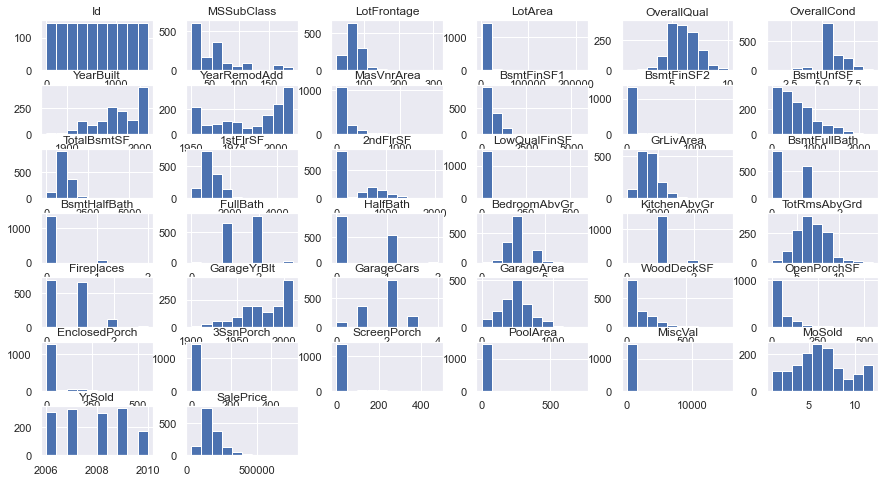

In [315]:
numerical_cols = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]
ax  = df[numerical_cols].hist(bins=10)

## Xử lí dữ liệu thiếu
- Ta thấy rằng nếu loại bỏ tất cả các dòng có dữ liệu thiếu sẽ làm các số lượng sample giảm đi rất nhiều. Điều này làm ảnh hưởng đến kết quả của các mô hình huấn luyện và làm sai lệch dữ liệu
- Trong trường hợp này ta sẽ tìm cách điền các dữ liệu thiếu này
- Ta điền bằng độ lệch skewness
- Nếu skewness >= 0.5 ta điền bằng median. Ngược lại điền bằng mean
- Để tiện cho quá trình tiền xử lý ta sẽ tạo một data pipeline với các bước: loại bỏ các cột có quá nửa là dữ liệu thiếu, điền dữ liệu thiếu vào các dòng như đề xuất trên

In [316]:
# Điền dữ liệu thiếu trong nume_df

class Drop_Cols:
    def __init__(self, dropped_cols=None):
        self.dropped_cols = dropped_cols
    def fit(self, X_df, y_df=None):
        missing_percentage = X_df.isna().sum()
        dropped_cols = missing_percentage.loc[missing_percentage>0.5].index
        self.dropped_cols = list(dropped_cols)
        return self
    def transform(self,X_df, y_df=None):
        return X_df.drop(columns=self.dropped_cols)
    
class Filling_Missing:
    def __init__(self, filled_cols=None):
        self.filled_cols = filled_cols
    def filling_missing(self, series):
        skewness = stats.skew(series)
        if series.isna().sum()==0:
            return series
        else:
            if skewness>=0.5:
                return series.fillna(np.nanmedian(series))
            else:
                return series.fillna(np.nanmean(series))
        return series
    def fit(self,X_df, y =None):
        self.filled_cols = [col for col in X_df.columns if X_df[col].dtype in [np.float64, np.int64]]
        return self
    def transform(self, X_df):
        return X_df[self.filled_cols].apply(self.filling_missing,axis=0)
    
numerical_cols = [col for col in df.columns if df[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in df.columns if col not in numerical_cols]

In [317]:
preprocessing_pipeline = make_pipeline(Drop_Cols(), Filling_Missing())

In [318]:
preprocessing_pipeline

Pipeline(steps=[('drop_cols',
                 <__main__.Drop_Cols object at 0x000001E78A05CFD0>),
                ('filling_missing',
                 <__main__.Filling_Missing object at 0x000001E78A05D2D0>)])

In [319]:
preprocessing_pipeline.fit(df)
nume_df = preprocessing_pipeline.transform(df)

In [320]:
nume_df.set_index(keys="Id", inplace=True)
nume_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500


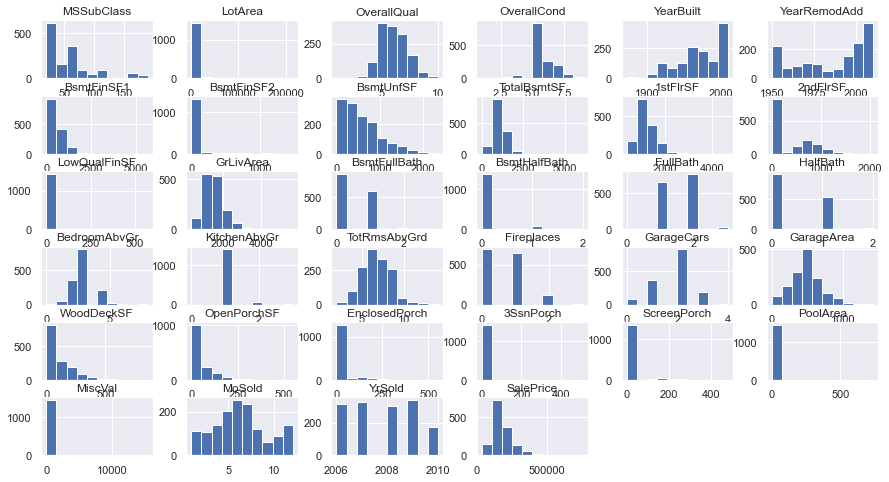

In [321]:
#Kiem tra lai cac phan phoi sau khi filling
ax=nume_df.hist(bins=10)

- Dữ liệu sau khi filling không có phân phối xác suất không thay đổi rõ rệt
- Điều này cho thây việc điền các giá trị thiếu không ảnh hưởng đến tính đúng của dữ liệu gốc

<AxesSubplot:>

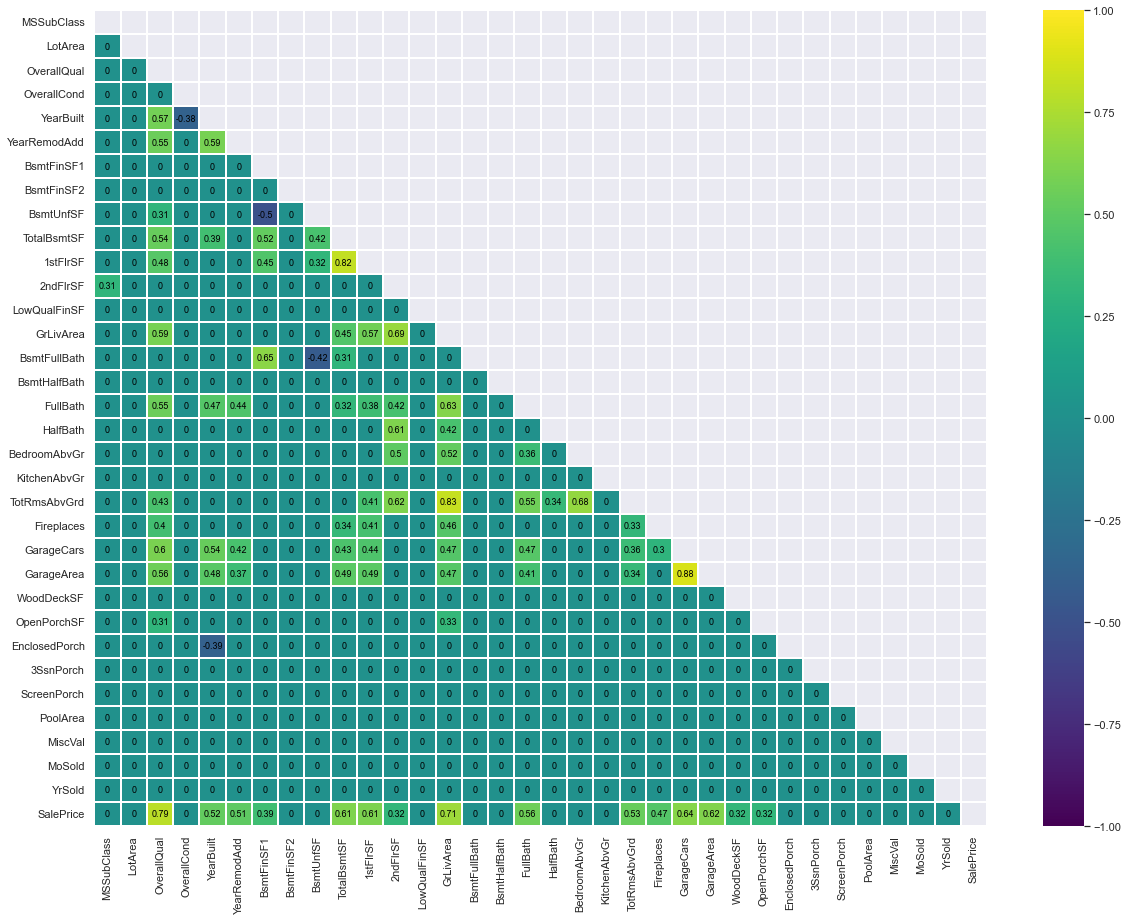

In [322]:
pd.options.display.float_format = "{:,.2f}".format
sns.set(rc = {'figure.figsize':(20,15)})
corr_matrix = nume_df.corr()
corr_matrix[np.abs(corr_matrix)<0.3]=0
sns.heatmap(corr_matrix, cmap="viridis",vmax=1.0, vmin=-1.0, linewidths=0.1, mask = np.triu(np.ones_like(corr_matrix, dtype=bool)), annot =True,annot_kws={"size": 9, "color": "black"})

- Chọn ra những thuộc tính ảnh hưởng mạnh lên SalePrice (relational coefficent>0.7)

In [323]:
corr_price_col = corr_matrix["SalePrice"][:-1]
strong_att = corr_price_col[np.abs(corr_price_col>0.7)]
strong_att

OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64

### Áp dụng mô hình OLS

In [324]:
cols = [name for name in strong_att.index if "Year" not in name]
cols

['OverallQual', 'GrLivArea']

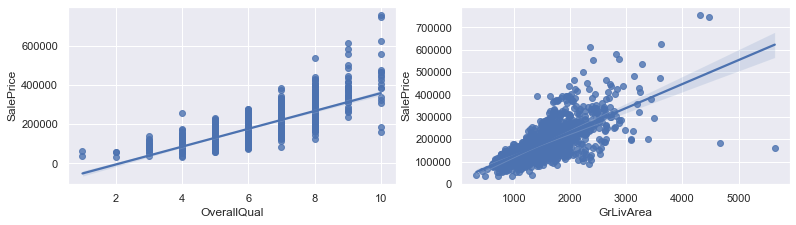

In [325]:
for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    sns.regplot(data=nume_df, x=cols[i], y="SalePrice")

- Ta thấy với OverallQual càng tăng thì SalePrice có xu hướng tăng. Nhưng các điểm trên plot OverallQual nếu là 1 đường thẳng thì dễ xảy ra underfitting
- Với GrLivArea, SalePrice có scale khá lớn ( $>10^3$ )
- Ta thử đề xuất môt hình $ log(SalePrice) \approx w2OverallQual^3 + w1log(GrLivArea) + w0$

In [326]:
exog = sm.add_constant(pd.concat([nume_df[cols[0]]**3,np.log10(nume_df[cols[1]])],axis=1))

In [327]:
ols = sm.OLS(np.log10(nume_df["SalePrice"]), exog)

- Mô hình cho kết quả khá tệ với RSS = 0.38
- Có thể điều này xảy ra do các attribute có scale khác nhau
- Có thể dùng zscore để chuẩn hoá

In [328]:
reg = ols.fit()

In [329]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     2014.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        17:28:32   Log-Likelihood:                 1454.1
No. Observations:                1460   AIC:                            -2902.
Df Residuals:                    1457   BIC:                            -2886.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.5587      0.061     58.493      0.000       3.439       3.678
OverallQual     0.0005   1.63e-05     33.212      0.000       0.001       0.001
GrLivArea       0.4818      0.020     24.053      0.000       0.443       0.521
==============================================================================
Omnibus:                      459.003   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2450.834
Skew:                          -1.367   Prob(JB):                         0.00
Kurtosis:                       8.728   Cond. No.                     8.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Nhận xét
- Mô hình có Rsquared = 0.734
- Hệ số p_value đều thấp => có ý nghĩa thống kê
- Giờ hãy thử trên tập test

In [330]:
linear_model = LinearRegression(fit_intercept=True)

In [331]:
X_train = pd.concat([nume_df[cols[0]]**3,np.log10(nume_df[cols[1]])],axis=1)
y_train = np.log10(nume_df["SalePrice"])

In [332]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [333]:
print(linear_model.coef_)
print(linear_model.intercept_)

[0.00054278 0.48182753]
3.558707184770723


In [334]:
mean_squared_error(linear_model.predict(X_train), y_train)

0.00798862879334595

- Có vẻ các hệ số của các biến độc lập đều giống với mô hinh OLS thử nghiệm ở trên
- Độ đo MSE ~ 0.0079886 (rất nhỏ) cho thấy mô hình hoạt động tốt trên tập training

In [335]:
df_test = pd.read_csv("test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.00,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.00,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.00,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.00,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [336]:
df_test.set_index(keys="Id", inplace=True)
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.00,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.00,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.00,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [337]:
df_test = df_test[[cols[0], cols[1]]]

In [338]:
df_test.isna().sum()

OverallQual    0
GrLivArea      0
dtype: int64

In [339]:
X_test =pd.concat([df_test["OverallQual"]**3,np.log10(df_test["GrLivArea"])],axis=1)

In [340]:
df_test["SalePrice"] = 0
df_test["SalePrice"]=10**linear_model.predict(X_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7640\1384015581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["SalePrice"] = 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_7640\1384015581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["SalePrice"]=10**linear_model.predict(X_test)


In [341]:
df_test

,OverallQual,GrLivArea,SalePrice
Id,,,
1461,5,896,"111,958.73"
1462,6,1329,"151,686.88"
1463,5,1629,"149,329.87"
1464,6,1604,"166,074.66"
1465,8,1280,"215,650.21"
...,...,...,...
2915,4,1092,"114,115.44"
2916,4,1092,"114,115.44"
2917,5,1224,"130,116.62"


In [342]:
df_test["SalePrice"].to_csv("submission_1.csv", index=True)

In [343]:
df_test.shape

(1459, 3)

- Như vậy có thể sử dụng mô hình
$ log_{10}(SalePrice) \approx 0.00054278OverallQual^3 + 0.48182753log_{10}(GrLivArea) + 3.55870718$

### Thử nghiệm MLP Regression

- Ta thử dùng mô hình MLP Regression trên dataset
- Các bước tiền xử lí:
- Loại bỏ các cột có > 50% dữ liệu thiếu
- Với các cột dạng numerical ta filling dựa trên độ lệch skewness như trên
- Với các cột categorical ta dùng mode để filling, và dùng one-hot-encoding trên các cột này
- Sau đó dùng standard scaler để chuẩn hoá các cột
- Cuối cùng là apply mô hình MLPRegression

In [344]:
df_2 = df.copy()
df_2.set_index("Id", inplace =True)
drop_cols = Drop_Cols()
drop_cols.fit(df_2)
df_2 = drop_cols.transform(df_2)

In [345]:
df_2

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [346]:
numerical_cols = [col for col in df_2.columns if df_2[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in df_2.columns if col not in numerical_cols]
numerical_cols.remove("SalePrice")

In [347]:
categorical_handle = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore", sparse=False))

In [348]:
step = make_column_transformer((categorical_handle, categorical_cols), (make_pipeline(Filling_Missing()), numerical_cols))

In [349]:
preprocessing_pipeline = make_pipeline(step, StandardScaler())

**Các thông số trong mô hình:**
- Max_iter (số vòng lặp tối đa): nếu mô hình hội tụ trước khi đủ 10000 mô hình sẽ trả về kết quả
- Ta sẽ dùng activation là hàm Relu vì giá trị hàm từ 0 đến vô cùng
- hidden layer size = 50

In [350]:
reg = MLPRegressor(max_iter=10000, random_state=0, alpha =0.5, activation="relu", solver="lbfgs",hidden_layer_sizes=(50))
mlp_pipeline = make_pipeline(preprocessing_pipeline, reg)
mlp_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['MSZoning',
                                                                    'Street',
                                                                    'LotShape',
                                                                    'LandContour',
                                                                    'Utilities',
                                                                    'LotConfig',
                                                                    'LandSlope',
                                                                    'Neighborho...
                                                                    'BsmtHalfBath',
                                                                    'FullBath',
                                                                    'HalfBath',
                                                                    'BedroomAbvGr',
                                                                    'KitchenAbvGr',
                                                                    'TotRmsAbvGrd',
                                                                    'Fireplaces',
                                                                    'GarageCars',
                                                                    'GarageArea',
                                                                    'WoodDeckSF',
                                                                    'OpenPorchSF',
                                                                    'EnclosedPorch',
                                                                    '3SsnPorch',
                                                                    'ScreenPorch',
                                                                    'PoolArea', ...])])),
                                 ('standardscaler', StandardScaler())])),
                ('mlpregressor',
                 MLPRegressor(alpha=0.5, hidden_layer_sizes=50, max_iter=10000,
                              random_state=0, solver='lbfgs'))])

In [351]:
X_train = df_2.iloc[:,:-1]
y_train = df_2.SalePrice

In [352]:
X_train

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,40,0,0,0,0,0,8,2007,WD,Normal
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,0,2,2010,WD,Normal
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,60,0,0,0,0,2500,5,2010,WD,Normal


In [353]:
y_train

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [354]:
mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['MSZoning',
                                                                    'Street',
                                                                    'LotShape',
                                                                    'LandContour',
                                                                    'Utilities',
                                                                    'LotConfig',
                                                                    'LandSlope',
                                                                    'Neighborho...
                                                                    'BsmtHalfBath',
                                                                    'FullBath',
                                                                    'HalfBath',
                                                                    'BedroomAbvGr',
                                                                    'KitchenAbvGr',
                                                                    'TotRmsAbvGrd',
                                                                    'Fireplaces',
                                                                    'GarageCars',
                                                                    'GarageArea',
                                                                    'WoodDeckSF',
                                                                    'OpenPorchSF',
                                                                    'EnclosedPorch',
                                                                    '3SsnPorch',
                                                                    'ScreenPorch',
                                                                    'PoolArea', ...])])),
                                 ('standardscaler', StandardScaler())])),
                ('mlpregressor',
                 MLPRegressor(alpha=0.5, hidden_layer_sizes=50, max_iter=10000,
                              random_state=0, solver='lbfgs'))])

In [355]:
mean_squared_error(mlp_pipeline.predict(X_train),y_train)

23594.03861462401

In [356]:
test_df = pd.read_csv("test.csv")
test_df.set_index("Id", inplace=True)

In [357]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.00,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.00,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.00,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [358]:
test_df["SalePrice"] = mlp_pipeline.predict(test_df)

In [359]:
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,"172,739.95"
1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,"234,365.10"
1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,"180,045.36"
1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,"192,914.68"
1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,"235,834.75"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.00,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,"85,954.84"
2916,160,RM,21.00,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,"85,302.27"
2917,20,RL,160.00,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,"206,886.08"


In [360]:
test_df["SalePrice"].to_csv("submission_2.csv", index=True)

### Nhận xét mô hình:
- Mô hình có Biased lớn, underfitting
- Có vẻ mô hình không hoạt động tốt lắm

### Mô hình SVR

- Ta thực hiện các bước tiền xử lí tương tự như MLP

In [361]:
svreg = SVR(C=1.0, epsilon=0.2)
svr_pipeline = make_pipeline(preprocessing_pipeline, svreg)

In [362]:
df_3 = df.copy()
X_train = df_3.iloc[:,:-1]
y_train = df_3.SalePrice

In [363]:
svr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse=False))]),
                                                                   ['MSZoning',
                                                                    'Street',
                                                                    'LotShape',
                                                                    'LandContour',
                                                                    'Utilities',
                                                                    'LotConfig',
                                                                    'LandSlope',
                                                                    'Neighborho...
                                                                    'TotalBsmtSF',
                                                                    '1stFlrSF',
                                                                    '2ndFlrSF',
                                                                    'LowQualFinSF',
                                                                    'GrLivArea',
                                                                    'BsmtFullBath',
                                                                    'BsmtHalfBath',
                                                                    'FullBath',
                                                                    'HalfBath',
                                                                    'BedroomAbvGr',
                                                                    'KitchenAbvGr',
                                                                    'TotRmsAbvGrd',
                                                                    'Fireplaces',
                                                                    'GarageCars',
                                                                    'GarageArea',
                                                                    'WoodDeckSF',
                                                                    'OpenPorchSF',
                                                                    'EnclosedPorch',
                                                                    '3SsnPorch',
                                                                    'ScreenPorch',
                                                                    'PoolArea', ...])])),
                                 ('standardscaler', StandardScaler())])),
                ('svr', SVR(epsilon=0.2))])

In [364]:
mean_squared_error(svr_pipeline.predict(X_train), y_train)

6622864688.725686

In [365]:
test_df = pd.read_csv("test.csv")
test_df.set_index("Id", inplace=True)
test_df["SalePrice"] = mlp_pipeline.predict(test_df)
test_df["SalePrice"].to_csv("submission_3.csv", index=True)

### Nhận xét:
- Tượng tự như MLP mô hình cũng bias khá cao